In [201]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancerdata/data.csv


In [202]:
df = pd.read_csv('data.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [203]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<h1 style='color:green;'> Data Handling </h1>

In [204]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [205]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [206]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

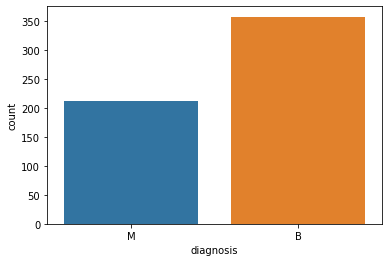

In [207]:
sns.countplot(df['diagnosis'])

<AxesSubplot:>

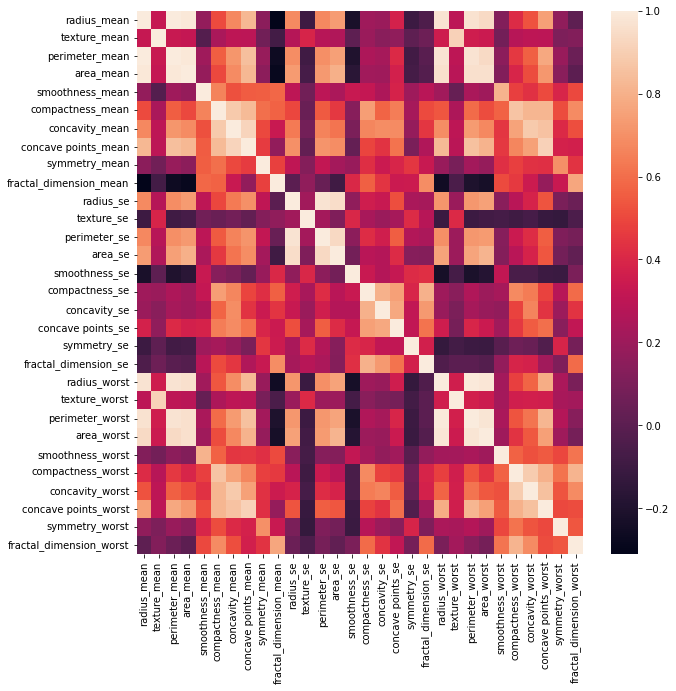

In [208]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [209]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [210]:
features = df.drop('diagnosis', axis=1)
features.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [211]:
target = df['diagnosis']

In [212]:
target.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

<h1>Standardisation</h1>

In [214]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Logistic Regression

In [215]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
yhat = LR.predict(X_test)

In [216]:
from sklearn.metrics import accuracy_score
LR_accuracy = accuracy_score(y_test, yhat)
LR_accuracy

0.9883040935672515

# Support Vector Classifier

In [217]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train, y_train)
sv_predict = sv.predict(X_test)
svm_accuracy = accuracy_score(y_test, sv_predict)
svm_accuracy

0.9649122807017544

# K Nearest Neighbors

In [218]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)
knn_accuracy

0.9649122807017544

# Decision Tree Classifier

In [219]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
dtc_accuracy = accuracy_score(y_test, dtc_predict)
dtc_accuracy

0.935672514619883

[Text(0.7325581395348837, 0.95, 'X[22] <= 0.197\ngini = 0.472\nsamples = 398\nvalue = [246, 152]'),
 Text(0.6046511627906976, 0.85, 'X[27] <= 0.676\ngini = 0.19\nsamples = 273\nvalue = [244, 29]'),
 Text(0.5581395348837209, 0.75, 'X[20] <= 0.098\ngini = 0.116\nsamples = 260\nvalue = [244, 16]'),
 Text(0.4418604651162791, 0.65, 'X[27] <= 0.289\ngini = 0.07\nsamples = 247\nvalue = [238, 9]'),
 Text(0.3488372093023256, 0.55, 'X[10] <= 2.21\ngini = 0.034\nsamples = 229\nvalue = [225, 4]'),
 Text(0.3023255813953488, 0.45, 'X[13] <= 0.159\ngini = 0.026\nsamples = 228\nvalue = [225, 3]'),
 Text(0.18604651162790697, 0.35, 'X[14] <= -1.247\ngini = 0.018\nsamples = 224\nvalue = [222, 2]'),
 Text(0.09302325581395349, 0.25, 'X[19] <= -0.831\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.046511627906976744, 0.15, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13953488372093023, 0.15, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.27906976744186046, 0.25, 'X[21] <= 1.228\ngini = 0.0

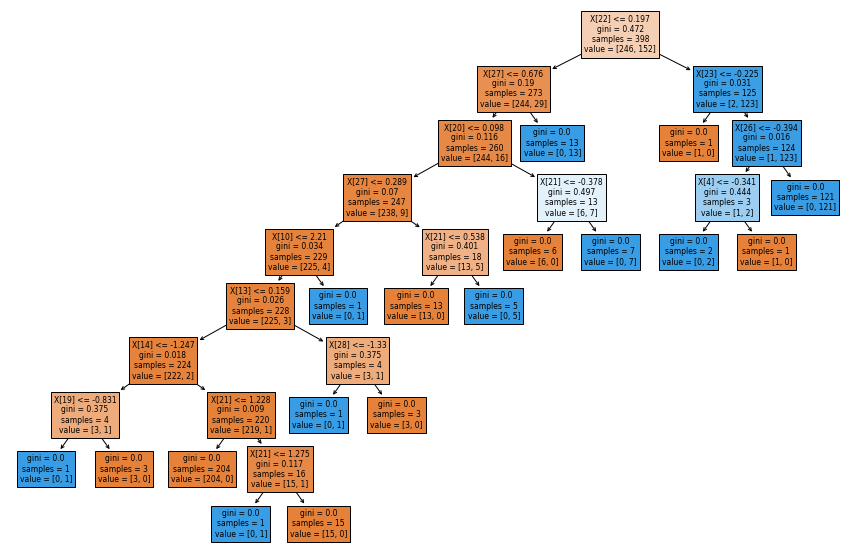

In [220]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc, filled=True)

# Random Forest Classifier

In [221]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_predict)
rfc_accuracy

0.9532163742690059

[Text(0.65625, 0.9375, 'X[22] <= 0.197\ngini = 0.467\nsamples = 249\nvalue = [250, 148]'),
 Text(0.4375, 0.8125, 'X[25] <= 0.872\ngini = 0.161\nsamples = 168\nvalue = [248, 24]'),
 Text(0.3125, 0.6875, 'X[24] <= 2.538\ngini = 0.063\nsamples = 151\nvalue = [236, 8]'),
 Text(0.25, 0.5625, 'X[1] <= 0.718\ngini = 0.056\nsamples = 150\nvalue = [236, 7]'),
 Text(0.1875, 0.4375, 'gini = 0.0\nsamples = 130\nvalue = [210, 0]'),
 Text(0.3125, 0.4375, 'X[27] <= -0.077\ngini = 0.334\nsamples = 20\nvalue = [26, 7]'),
 Text(0.1875, 0.3125, 'X[18] <= -0.442\ngini = 0.137\nsamples = 15\nvalue = [25, 2]'),
 Text(0.125, 0.1875, 'X[13] <= -0.44\ngini = 0.408\nsamples = 4\nvalue = [5, 2]'),
 Text(0.0625, 0.0625, 'gini = 0.0\nsamples = 3\nvalue = [5, 0]'),
 Text(0.1875, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(0.25, 0.1875, 'gini = 0.0\nsamples = 11\nvalue = [20, 0]'),
 Text(0.4375, 0.3125, 'X[20] <= -0.289\ngini = 0.278\nsamples = 5\nvalue = [1, 5]'),
 Text(0.375, 0.1875, 'gini = 0.0\nsam

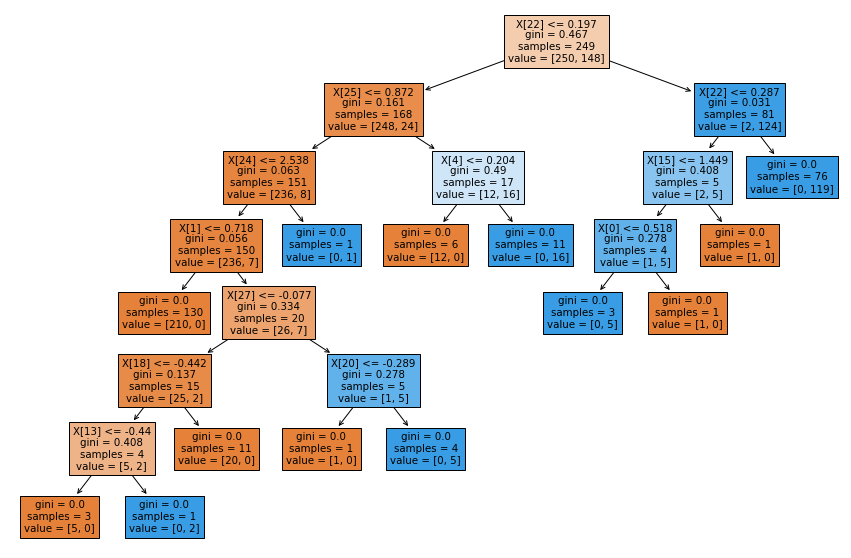

In [222]:
plt.figure(figsize=(15,10))
tree.plot_tree(rfc.estimators_[0], filled=True)

In [223]:
results = pd.DataFrame()
tempResults = pd.DataFrame({'Algorithm':['KNN', 'Logistic Regression', 'SVM', 'Random Forest Classifier', 'Decision Tree Classifier'], 'Accuracy':[knn_accuracy, LR_accuracy, svm_accuracy, rfc_accuracy, dtc_accuracy]})
results = tempResults[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,KNN,0.964912
1,Logistic Regression,0.988304
2,SVM,0.964912
3,Random Forest Classifier,0.953216
4,Decision Tree Classifier,0.935673


<h1>THE END</h1>